In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("./data/human_activity_recognition/train.csv")
df.shape

(7352, 563)

In [10]:
# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Removing duplicate columns
print(f'Number of duplicate columns: {df.columns.duplicated().sum()}')
df = df.loc[:, ~df.columns.duplicated()]

Number of duplicate columns: 0


## Variance Threshold
- Remove features having low variance

### Points to Consider

- Ignores Target Variable: 
   Variance Threshold is a univariate method, meaning it evaluates each feature independently and doesn’t 
   consider the relationship between each feature and the target variable. This means it may keep irrelevant 
   features that have a high variance but no relationship with the target, or discard potentially useful 
   features that have a low variance but a strong relationship with the target.

- Ignores Feature Interactions: 
   Variance Threshold doesn’t account for interactions between features. 
   A feature with a low variance may become very informative when combined with another feature.

- Sensitive to Data Scaling: 
   Variance Threshold is sensitive to the scale of the data. If features are not on the same scale, 
   the variance will naturally be higher for features with larger values. Therefore, it is important to 
   standardize the features before applying Variance Threshold.

- Arbitrary Threshold Value: 
   It’s up to the user to define what constitutes a “low” variance. The threshold is not always easy to 
   define and the optimal value can vary between datasets


In [17]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.05)
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [18]:
#  sel.get_support gives True or False 
# (True means variance of that feature is above threshold)
# (False means variance of that feature is leas than threshold variance)
sum(sel.get_support())

370

In [19]:
columns = X_train.columns[sel.get_support()] # extract columns which have variance above threshold variance
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=370)

In [20]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [22]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
print(X_train.shape)
print(X_test.shape)

(5881, 370)
(1471, 370)


## Correlation based
- Removes multicollinearity (dependent features are removed)

<Axes: >

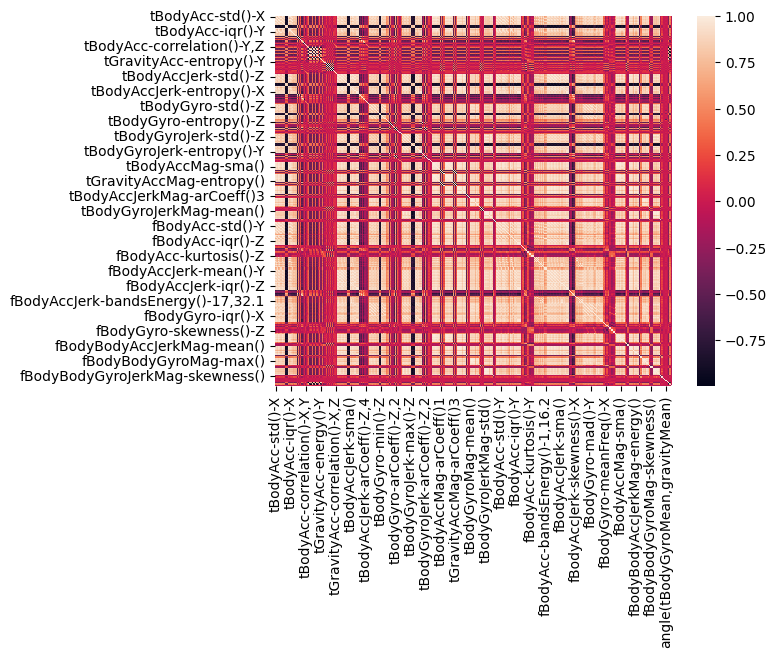

In [25]:
import seaborn as sns

# Visualizing correlation
sns.heatmap(X_train.corr())

In [26]:
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

In [28]:
# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95: # multicolinear features removal
            columns_to_drop.append(columns[j])
            
columns_to_drop = set(columns_to_drop)
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(5881, 153)
(1471, 153)


### Disadvantages

    - Linearity Assumption: Correlation measures the linear relationship between two variables. It does not capture non-linear relationships well. If a relationship is nonlinear, the correlation coefficient can be misleading.
    - Doesn’t Capture Complex Relationships: Correlation only measures the relationship between two variables at a time. It may not capture complex relationships involving more than two variables.
    - Threshold Determination: Just like variance threshold, defining what level of correlation is considered “high” can be subjective and may vary depending on the specific problem or dataset.
    - Sensitive to Outliers: Correlation is sensitive to outliers. A few extreme values can significantly skew the correlation coefficient.

## ANOVA 

In [29]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

#f_classif its internally perform ANOVA test 
sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

In [30]:
# display selected feature names
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [31]:
columns = X_train.columns[sel.get_support()]
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


### Disadvantages

    - Assumption of Normality: ANOVA assumes that the data for each group follow a normal distribution. This assumption may not hold true for all datasets, especially those with skewed distributions.
    - Assumption of Homogeneity of Variance: ANOVA assumes that the variances of the different groups are equal. This is the assumption of homogeneity of variance (also known as homoscedasticity). If this assumption is violated, it may lead to incorrect results.
    - Independence of Observations: ANOVA assumes that the observations are independent of each other. This might not be the case in datasets where observations are related (e.g., time series data, nested data).
    - Effect of Outliers: ANOVA is sensitive to outliers. A single outlier can significantly affect the F-statistic leading to a potentially erroneous conclusion. 
    - Doesn’t Account for Interactions: Just like other univariate feature selection methods, ANOVA does not consider interactions between features